In [1]:
import pandas as pd

# load csv to df
df = pd.read_csv('/home/locke/ManifoldRG/MultiNet/src/v0_2results/dataset_analysis_results.csv')
display(df.head(16))

,dataset,mean_shannon_entropy,mean_delentropy,gpt4o_macro_recall,gpt4_1_macro_recall,openvla_macro_recall,pi0_base_macro_recall,pi0_fast_macro_recall
0,bigfish,7.568379,12.311400,0.054076,0.107309,0.111799,0.098474,0.021755
1,bossfight,5.975154,12.180079,0.032695,0.067702,0.097256,0.069589,0.111771
2,caveflyer,3.813475,8.986970,0.042892,0.093763,0.101209,0.085061,0.060036
3,chaser,5.965489,11.597391,0.033745,0.115701,0.107188,0.098693,0.071241
4,climber,4.079287,8.158931,0.089290,0.112740,0.103991,0.083601,0.042227
5,coinrun,2.800794,7.938647,0.078521,0.108867,0.109655,0.096292,0.023583
6,dodgeball,6.175385,11.600460,0.050361,0.089868,0.098421,0.064053,0.040536
7,fruitbot,5.180192,9.885132,0.021250,0.094484,0.098065,0.069969,0.037527
8,heist,4.459111,10.495605,0.069493,0.108030,0.108518,0.078358,0.016160
9,jumper,3.183497,8.642766,0.100302,0.114033,0.117714,0.095701,0.031420


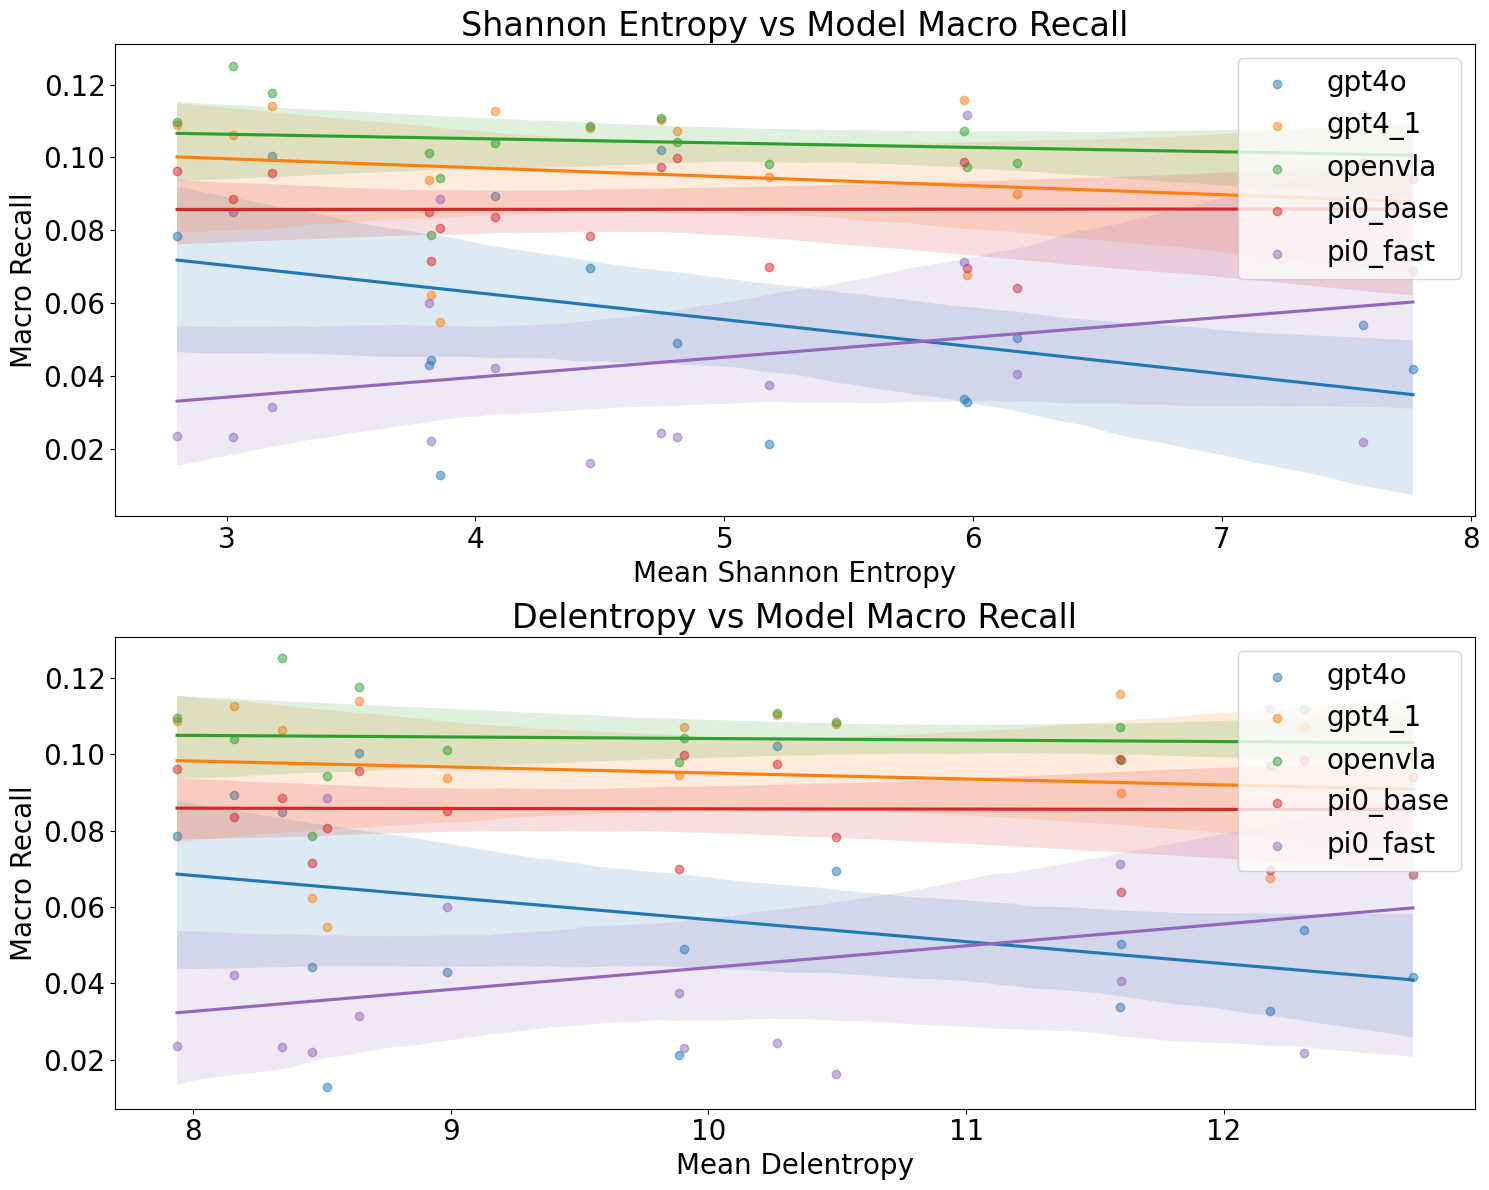

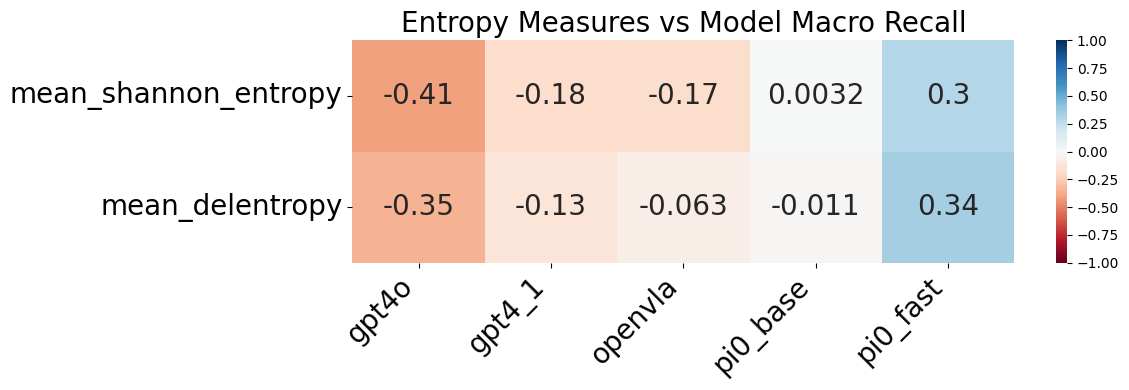


Correlations with entropy measures:

Shannon Entropy correlations:
gpt4o: -0.409
gpt4_1: -0.183
openvla: -0.173
pi0_base: 0.003
pi0_fast: 0.296

Delentropy correlations:
gpt4o: -0.345
gpt4_1: -0.126
openvla: -0.063
pi0_base: -0.011
pi0_fast: 0.336


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# First, let's create scatter plots for both entropy measures against each model's performance
model_cols = ['gpt4o_macro_recall', 'gpt4_1_macro_recall', 'openvla_macro_recall', 
              'pi0_base_macro_recall', 'pi0_fast_macro_recall']

# Create a figure with two rows of subplots (one for Shannon entropy, one for delentropy)
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot for Shannon Entropy
for model in model_cols:
    sns.regplot(data=df, x='mean_shannon_entropy', y=model, 
                scatter_kws={'alpha':0.5}, 
                label=model.replace('_macro_recall', ''),
                ax=axes[0])
axes[0].set_title('Shannon Entropy vs Model Macro Recall', fontsize=24)
axes[0].set_xlabel('Mean Shannon Entropy', fontsize=20)
axes[0].set_ylabel('Macro Recall', fontsize=20)
axes[0].legend(fontsize=20, loc='upper right')
axes[0].tick_params(labelsize=20)

# Plot for Delentropy
for model in model_cols:
    sns.regplot(data=df, x='mean_delentropy', y=model, 
                scatter_kws={'alpha':0.5}, 
                label=model.replace('_macro_recall', ''),
                ax=axes[1])
axes[1].set_title('Delentropy vs Model Macro Recall', fontsize=24)
axes[1].set_xlabel('Mean Delentropy', fontsize=20)
axes[1].set_ylabel('Macro Recall', fontsize=20)
axes[1].legend(fontsize=20, loc='upper right')
axes[1].tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# Select just the entropy measures and model performances
entropy_measures = ['mean_shannon_entropy', 'mean_delentropy']

# Calculate the focused correlations
focused_correlations = df[entropy_measures + model_cols].corr().loc[entropy_measures, model_cols]

# Create a more focused heatmap
plt.figure(figsize=(12, 4))
# Create the heatmap with modified xticklabels
sns.heatmap(focused_correlations, annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1,
            xticklabels=[col.replace('_macro_recall', '') for col in model_cols],
            annot_kws={'size': 20})
plt.title('Entropy Measures vs Model Macro Recall', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
plt.show()

# Print the correlations with entropy measures
print("\nCorrelations with entropy measures:")
print("\nShannon Entropy correlations:")
for model in model_cols:
    corr = focused_correlations.loc['mean_shannon_entropy', model]
    print(f"{model.replace('_macro_recall', '')}: {corr:.3f}")

print("\nDelentropy correlations:")
for model in model_cols:
    corr = focused_correlations.loc['mean_delentropy', model]
    print(f"{model.replace('_macro_recall', '')}: {corr:.3f}")